# 1. Import lib


In [163]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

pd.set_option("display.float_format", "{:.1f}".format)

# Add data


In [164]:
df = pd.read_csv('movies_data_processed.csv')
df

,name,genres,type,rating,no_of_votes,meta_score,release_date,gross,budget,countries,url,ROI,result
0,Attack on Titan,"Action Epic, Adult Animation, Anime, Shōnen, S...",TV Series,9.1,591000.0,NaN,2013.0,NaN,NaN,Japan,https://www.imdb.com/title/tt2560140/?ref_=sr_...,NaN,Success
1,Love Hurts,"Martial Arts, Action, Comedy",Movie,5.3,6800.0,34.0,2025.0,17235040.0,18000000.0,United States,https://www.imdb.com/title/tt30788842/?ref_=sr...,-0.0,Fail
2,The Quick and the Dead,"Action, Drama, Romance, Thriller, Western",Movie,6.5,107000.0,49.0,1995.0,18636537.0,32000000.0,"United States, Japan",https://www.imdb.com/title/tt0114214/?ref_=sr_...,-0.4,Success
3,The Equalizer,"Cop Drama, Police Procedural, Action, Crime, D...",TV Series,5.6,19000.0,NaN,2021.0,NaN,NaN,United States,https://www.imdb.com/title/tt11242246/?ref_=sr...,NaN,Fail
4,Goosebumps,"Teen Horror, Action, Adventure, Comedy, Drama,...",TV Series,6.7,15000.0,NaN,2023.0,NaN,NaN,"United States, Canada, France",https://www.imdb.com/title/tt17720272/?ref_=sr...,NaN,Fail
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7989,Chuka,Western,Movie,6.3,1100.0,NaN,1967.0,NaN,NaN,United States,https://www.imdb.com/title/tt0061477/?ref_=sr_...,NaN,Fail
7990,Unforgiven,"Period Drama, Tragedy, Drama, Western",Movie,8.2,451000.0,85.0,1992.0,159167799.0,14400000.0,United States,https://www.imdb.com/title/tt0105695/?ref_=sr_t_3,10.1,Success
7991,The Duel,"Drama, Western",Movie,5.8,12000.0,42.0,2016.0,20672.0,10000000.0,United States,https://www.imdb.com/title/tt2436682/?ref_=sr_...,-1.0,Fail
7992,Calamity Jane,"Classic Musical, Musical, Romance, Western",Movie,7.2,11000.0,74.0,1953.0,7150.0,NaN,United States,https://www.imdb.com/title/tt0045591/?ref_=sr_...,NaN,Success


In [165]:
df.head()

,name,genres,type,rating,no_of_votes,meta_score,release_date,gross,budget,countries,url,ROI,result
0,Attack on Titan,"Action Epic, Adult Animation, Anime, Shōnen, S...",TV Series,9.1,591000.0,NaN,2013.0,NaN,NaN,Japan,https://www.imdb.com/title/tt2560140/?ref_=sr_...,NaN,Success
1,Love Hurts,"Martial Arts, Action, Comedy",Movie,5.3,6800.0,34.0,2025.0,17235040.0,18000000.0,United States,https://www.imdb.com/title/tt30788842/?ref_=sr...,-0.0,Fail
2,The Quick and the Dead,"Action, Drama, Romance, Thriller, Western",Movie,6.5,107000.0,49.0,1995.0,18636537.0,32000000.0,"United States, Japan",https://www.imdb.com/title/tt0114214/?ref_=sr_...,-0.4,Success
3,The Equalizer,"Cop Drama, Police Procedural, Action, Crime, D...",TV Series,5.6,19000.0,NaN,2021.0,NaN,NaN,United States,https://www.imdb.com/title/tt11242246/?ref_=sr...,NaN,Fail
4,Goosebumps,"Teen Horror, Action, Adventure, Comedy, Drama,...",TV Series,6.7,15000.0,NaN,2023.0,NaN,NaN,"United States, Canada, France",https://www.imdb.com/title/tt17720272/?ref_=sr...,NaN,Fail


In [166]:
df.isnull().sum()

name               0
genres             0
type               0
rating           244
no_of_votes      244
meta_score      4348
release_date      58
gross           4461
budget          4887
countries         36
url                0
ROI             5140
result             0
dtype: int64

In [167]:
df.dtypes

name             object
genres           object
type             object
rating          float64
no_of_votes     float64
meta_score      float64
release_date    float64
gross           float64
budget          float64
countries        object
url              object
ROI             float64
result           object
dtype: object

Điều kiện để dánh giá phim tốt <br>
rating > 7.5 <br>
meta_score > 72 <br>

# 2. Phân tích data theo địa lý và quốc gia sản xuất (Phần 3)
Mục tiêu: 
- Kiểm tra các mối tương quan giữa các features
- Kiểm tra xem có thể dữ đoán rating dựa vào quốc gia ko, hoặc quốc gia + thể loại + năm.

In [168]:
encoded_file_path = "movies_data_encoded.csv"

In [169]:
df_encoded = pd.read_csv(encoded_file_path)
df_encoded.head()

,release_date,rating,type_encoded,gross,Australia,Belgium,Brazil,Bulgaria,Canada,China,...,Sweden,Switzerland,Taiwan,Thailand,United Arab Emirates,United Kingdom,United States,West Germany,gross_log,gross_scaled
0,1995.0,6.5,0.0,18636537.0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,16.7,-0.2
1,2022.0,7.8,0.0,481757663.0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,20.0,0.9
2,1997.0,7.6,0.0,263920180.0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,19.4,0.7
3,1978.0,7.4,0.0,300478449.0,0,0,0,0,0,0,...,0,1,0,0,0,1,1,0,19.5,0.7
4,2024.0,6.3,0.0,185900759.0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,19.0,0.6


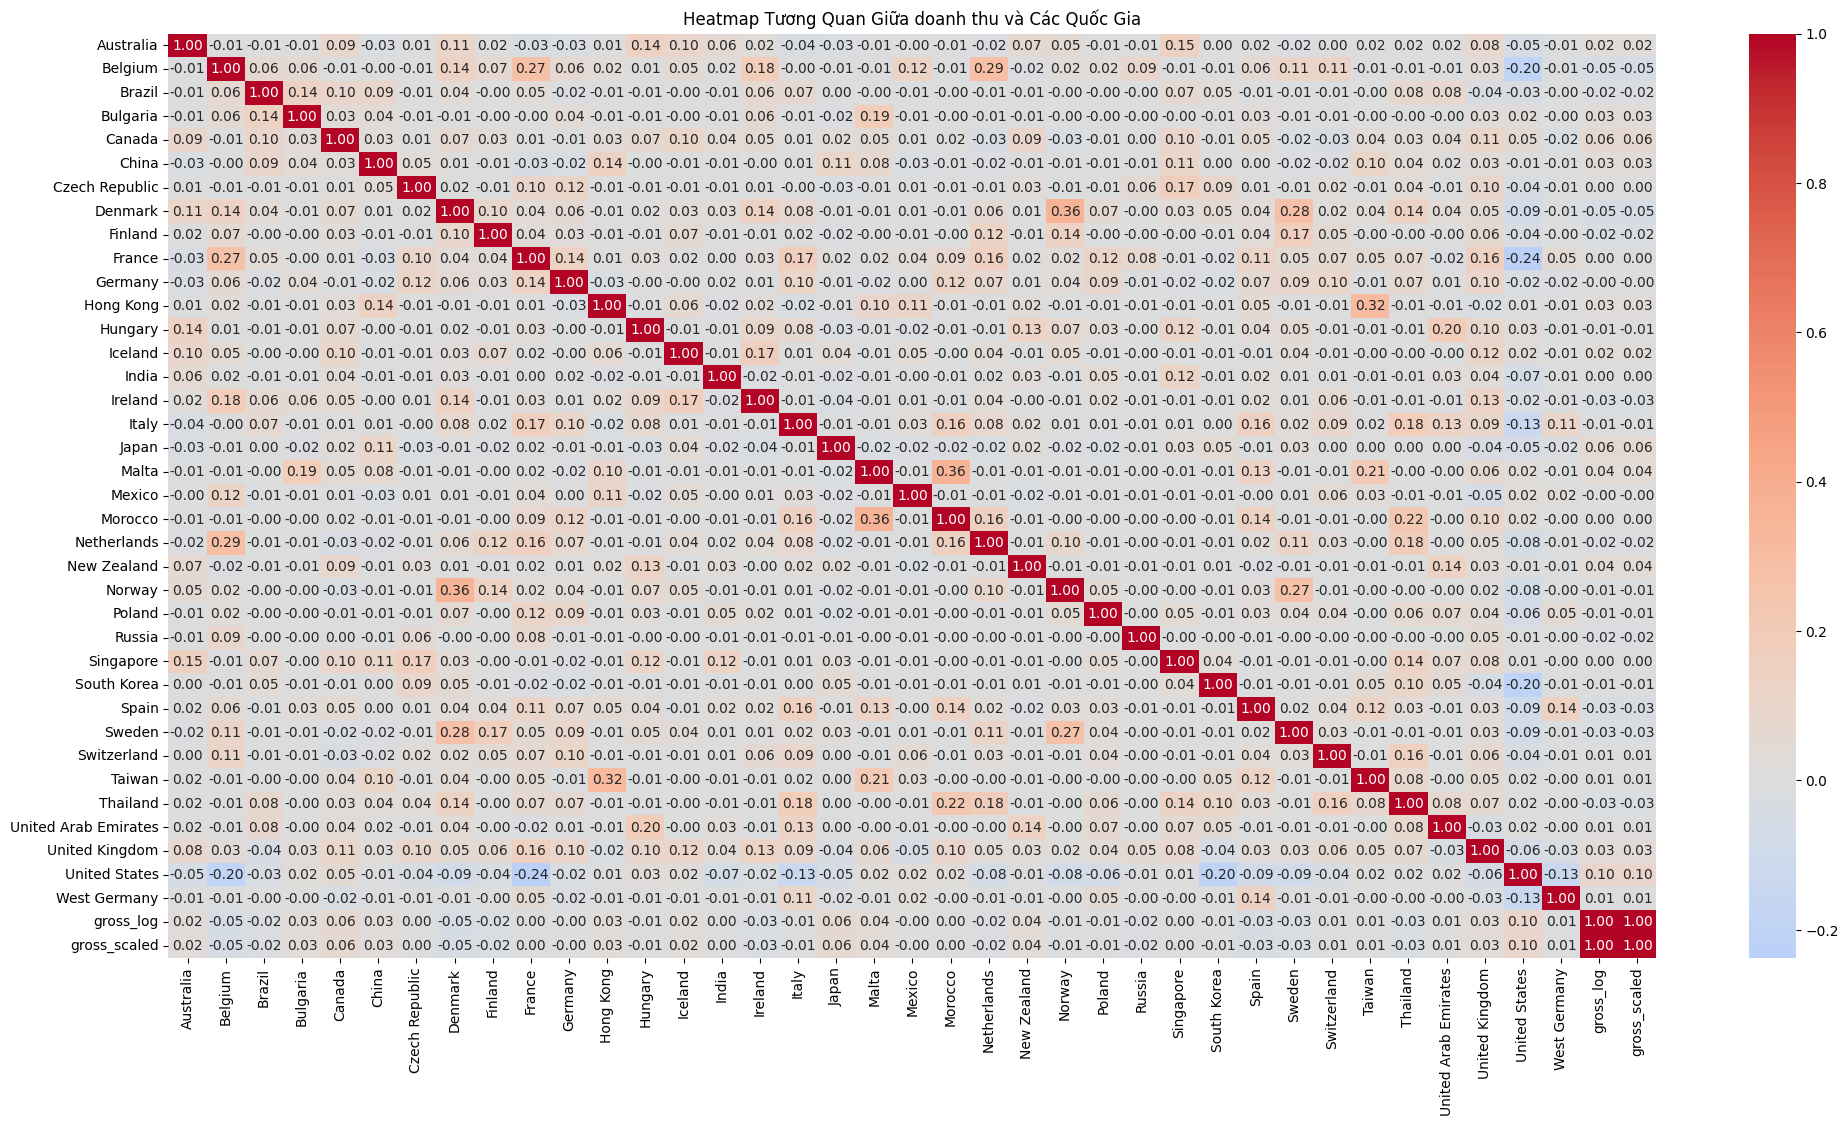

In [170]:
# Lọc chỉ các cột liên quan đến countries và rating
selected_corr = df_encoded.drop(columns = ['rating', 'gross', 'release_date', 'type_encoded']).corr()

# Vẽ heatmap tương quan chỉ với các quốc gia
plt.figure(figsize=(24, 12))
sns.heatmap(selected_corr, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Heatmap Tương Quan Giữa doanh thu và Các Quốc Gia")
plt.show()

- Tương quan thấp giữa doanh thu và các quốc gia

    Cột gross_scaled có giá trị tương quan thấp với tất cả các quốc gia, cho thấy không có quốc gia nào đóng vai trò chi phối tuyệt đối doanh thu tổng thể.

- Mối tương quan âm đáng chú ý

    countries_United States có tương quan âm với countries_United Kingdom (-0.59), countries_France (-0.34), countries_Japan (-0.30), và countries_China (-0.20).

    Điều này có thể phản ánh việc khi doanh thu tăng ở một số quốc gia khác thì có xu hướng giảm nhẹ ở Hoa Kỳ, có thể do cạnh tranh giữa các thị trường.

- Tương quan dương mạnh nhất (1.00) giữa cùng một quốc gia

    Điều này thể hiện chính xác rằng mỗi quốc gia có tương quan tuyệt đối với chính nó, điều này là hiển nhiên.

- Tương quan giữa các quốc gia khá thấp

    Không có cặp quốc gia nào có mức tương quan cao đáng kể, cho thấy doanh thu phim ở mỗi quốc gia có thể hoạt động tương đối độc lập, không bị ảnh hưởng nhiều bởi các thị trường khác.

In [ ]:
# Lấy dữ liệu chỉ chứa One-Hot Encoding của quốc gia và cột release_date
country_features = df_encoded.drop(columns = ['gross', 'gross_log', 'gross_scaled', 'type_encoded']) #pd.concat([df_encoded[country_columns], df_encoded["release_date"], df_encoded["type_encoded"]], axis=1)

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
country_features_scaled = scaler.fit_transform(country_features)

# Áp dụng t-SNE sau khi đã giảm chiều bằng PCA
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
country_tsne = tsne.fit_transform(country_features_scaled)

# Chuyển thành DataFrame để trực quan hóa
df_tsne = pd.DataFrame(country_tsne, columns=["TSNE1", "TSNE2"])
df_tsne["gross_scaled"] = df_encoded["gross_scaled"]

# Vẽ scatter plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df_tsne["TSNE1"], df_tsne["TSNE2"], c=df_tsne["gross_scaled"], cmap="coolwarm", edgecolor="k")
plt.colorbar(scatter, label="Gross Scaled")
plt.title("t-SNE Scatter Plot of Countries vs Gross Scaled")
plt.xlabel("TSNE 1")
plt.ylabel("TSNE 2")
plt.show()

<Axes: xlabel='gross_scaled', ylabel='Count'>

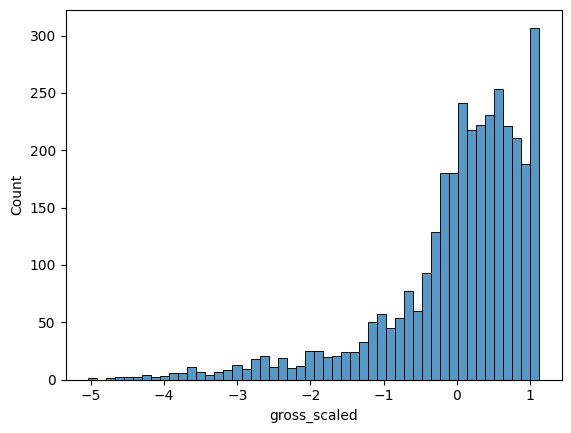

In [151]:
sns.histplot(df_encoded["gross_scaled"], bins=50)